## NYCHA Development Data Book

* the data lists all of the NYCHA's Developments alphabetically and includes essential information, such as development identification numbers, program and construction type, number of apartments and rental rooms, population, etc.

* link to the documentation [NYC OpenData](https://data.cityofnewyork.us/Housing-Development/NYCHA-Development-Data-Book/evjd-dqpz)

* The data is provided by New York City Housing Authority (NYCHA).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.reset_option('display.float_format')

In [5]:
df = pd.read_csv('NYCHA_Development_Data_Book.csv')
df.sample(5)

,DATA AS OF,DEVELOPMENT,HUD AMP#,TDS#,CONSOLIDATED TDS#,DEVELOPMENT EDP#,OPERATING EDP#,HUD #,PROGRAM,METHOD,...,COMMUNITY DISTIRCT,US CONGRESSIONAL DISTRICT,NY STATE SENATE DISTRICT,NY STATE ASSEMBLY DISTRICT,NY CITY COUNCIL DISTRICT,COMPLETION DATE,FEDERALIZED DEVELOPMENT,SENIOR DEVELOPMENT,ELECTRICITY PAID BY RESIDENTS,PRIVATE MANAGEMENT
278,1/1/2019,TODT HILL,NY005000520,042,042,583,583,NY005268A,FEDERAL,CONVENTIONAL,...,2,11,24,63,49,6/1/1950,1980/07/01-ATP 6,NaN,NaN,NaN
101,1/1/2019,FHA REPOSSESSED HOUSES (GROUP IV),NY005012090,226,91,345,324,NY005159,FEDERAL,CONVENTIONAL,...,NaN,NaN,NaN,NaN,NaN,6/30/1971,NaN,NaN,NaN,NaN
286,1/1/2019,UNIVERSITY AVENUE REHAB,NY005013410,341,341,762,762,NY005283,FEDERAL,TURNKEY,...,5,15,29,86,14,1/31/1985,NaN,NaN,YES,YES
114,1/1/2019,GARVEY (GROUP A),NY005012520,252,252,381,381,NY005166,FEDERAL,CONVENTIONAL,...,16,9,20,55,41,2/28/1975,NaN,PARTIALLY,NaN,NaN
109,1/1/2019,FIRST HOUSES,NY005012920,001,337,370,370,NY005181A,FEDERAL,CONVENTIONAL,...,3,12,26,74,02,5/31/1936,1972/06/29-FED TRAN,NaN,YES,NaN


### 1. Clean Data

* drop unneeded/extraveneous columns

In [6]:
df = df.drop(['DATA AS OF', 'HUD AMP#', 'TDS#', 'CONSOLIDATED TDS#', 'DEVELOPMENT EDP#', 'OPERATING EDP#', 'HUD #', 
              'NUMBER OF SECTION 8 TRANSITION APARTMENTS', 'POPULATION SECTION 8 TRANSITION',
              'LOCATION STREET A', 'LOCATION STREET B', 'LOCATION STREET C', 'LOCATION STREET D', 
              'US CONGRESSIONAL DISTRICT', 'NY STATE SENATE DISTRICT', 'NY STATE ASSEMBLY DISTRICT', 'NY CITY COUNCIL DISTRICT', 
              'FEDERALIZED DEVELOPMENT', 'SENIOR DEVELOPMENT', 'ELECTRICITY PAID BY RESIDENTS', 'PRIVATE MANAGEMENT'], 
              axis=1)

* type conversion to `str`

In [7]:
text_cols = ['DEVELOPMENT', 'PROGRAM', 'METHOD', 'TYPE', 'BOROUGH', 'COMMUNITY DISTIRCT']
for col in text_cols:
    df[col].astype(str)

* type conversion to `datetime`

In [8]:
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'], errors='coerce')

* transform numeric columns

In [9]:
num_cols = ['NUMBER OF CURRENT APARTMENTS', 'TOTAL NUMBER OF APARTMENTS', 
            'AVG NO R/R PER APARTMENT', 'NUMBER OF RENTAL ROOMS',
            'POPULATION PUBLIC HOUSING', 'TOTAL POPULATION', 'TOTAL # OF FIXED INCOME HOUSEHOLD',
           'TOTAL AREA SQ FT', 'NET DEV AREA SQ FT', 'BLDG COVERAGE SQ FT', 'CUBAGE CU FT', 'BLDG COVERAGE %',
           'DEVELOPMENT COST', 'PER RENTAL ROOM', 'AVG MONTHLY GROSS RENT']
for col in num_cols:
    df[col] = df[col].map(lambda x : float(str(x).replace(',','').replace('$','').replace('%', '')) if x!=np.nan else x)


### 2. Basic Analysis

#### look into the the relationship (if any) between the occupancy completion date and the cost to develop a property per its rental room

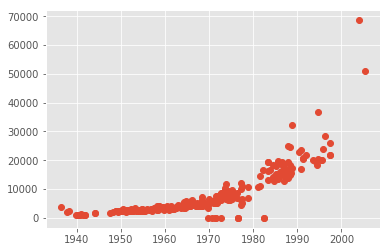

In [10]:
plt.plot_date(df['COMPLETION DATE'], df['PER RENTAL ROOM'])

#### Look into the summary statistics of the development density

In [11]:
stats = df['DENSITY'].describe()
stats

count   320.00
mean    215.28
std     122.44
min      10.00
25%     125.00
50%     199.00
75%     279.25
max     852.00
Name: DENSITY, dtype: float64

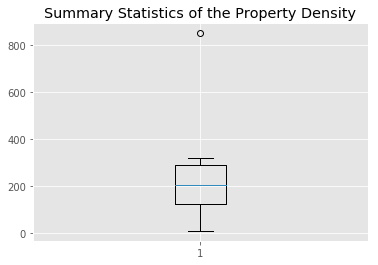

In [12]:
plt.boxplot(stats)
plt.title('Summary Statistics of the Property Density')
plt.show()

#### Look into the break down of boroughs and different types

In [13]:
boroughs = df['BOROUGH'].value_counts(sort=False)
boroughs

BRONX             76
MANHATTAN        105
STATEN ISLAND     10
BROOKLYN         101
QUEENS            21
Name: BOROUGH, dtype: int64

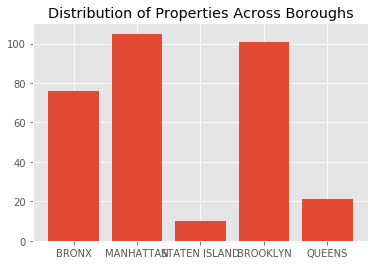

In [14]:
plt.bar(*zip(*boroughs.items()))
plt.title('Distribution of Properties Across Boroughs')
plt.show()

In [15]:
types = df['TYPE'].value_counts(sort=False)
types

NEW CONST          226
REHAB               55
NEW CONST (ELD)     36
GUT REHAB            1
REHAB (ELD)          5
Name: TYPE, dtype: int64

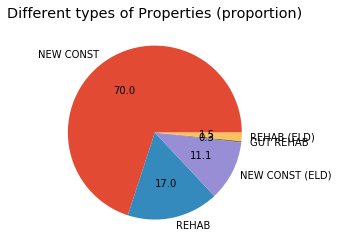

In [16]:
plt.pie(types.values, labels=types.index, autopct='%1.1f')
plt.title('Different types of Properties (proportion)')
plt.show()